<a href="https://colab.research.google.com/github/sid-vt/DL-Research/blob/main/2DCNNv2_Hole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import glob

from PIL import Image
import cv2

import random
import math

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

pd.options.display.max_rows = 3000

# import h5py
# import torchvision

In [116]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
# top left corner +1 and bottom corner as it is 
# img_read[y1+1:y2, x1:x2]

image = []
for image_path in glob.glob('/content/drive/MyDrive/Colab Notebooks/ResearchCNN/20_Holes/*.png'):
    img_read = cv2.imread(image_path)
    crop_img = img_read[82:147, 81:146]
    # resize = cv2.resize(crop_img, (64, 64))
    # image.append(resize)
    image.append(crop_img)
image = np.asarray(image)

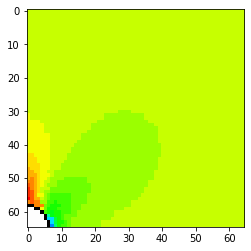

In [118]:
data = image[15]
img_show = Image.fromarray(image[15], 'RGB')
plt.imshow(data, interpolation='nearest')
plt.show()

In [119]:
X = image

In [120]:
x = (X - X.min())/(X.max() - X.min())
x[10]

array([[[0.78039216, 1.        , 0.        ],
        [0.78039216, 1.        , 0.        ],
        [0.78039216, 1.        , 0.        ],
        ...,
        [0.78039216, 1.        , 0.        ],
        [0.78039216, 1.        , 0.        ],
        [0.78039216, 1.        , 0.        ]],

       [[0.78039216, 1.        , 0.        ],
        [0.78039216, 1.        , 0.        ],
        [0.78039216, 1.        , 0.        ],
        ...,
        [0.78039216, 1.        , 0.        ],
        [0.78039216, 1.        , 0.        ],
        [0.78039216, 1.        , 0.        ]],

       [[0.78039216, 1.        , 0.        ],
        [0.78039216, 1.        , 0.        ],
        [0.78039216, 1.        , 0.        ],
        ...,
        [0.78039216, 1.        , 0.        ],
        [0.78039216, 1.        , 0.        ],
        [0.78039216, 1.        , 0.        ]],

       ...,

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0

In [121]:
X.shape

(20, 65, 65, 3)

In [122]:
X_single = X.mean(axis=3).mean(axis=2).mean(axis=1)
X_single

array([125.51408284, 115.41759369, 144.66635108, 147.26453649,
       148.18934911, 144.9512426 , 147.48386588, 132.69767258,
       164.19731755, 159.27439842, 147.65364892, 115.60457594,
       160.52852071, 136.26824458, 151.1130572 , 148.27061144,
       145.60433925, 130.23439842, 136.15242604, 131.81704142])

In [123]:
# Scaling with min max
Xnorm = (X_single - X_single.min())/(X_single.max() - X_single.min())
Xnorm

array([0.20698127, 0.        , 0.59960892, 0.65287255, 0.67183151,
       0.60544928, 0.65736887, 0.35424717, 1.        , 0.89907858,
       0.66084948, 0.0038332 , 0.92478849, 0.42744504, 0.73176846,
       0.67349741, 0.61883798, 0.30374925, 0.42507072, 0.33619394])

In [124]:
y = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/ResearchCNN/20_Holes/results.txt')
ynorm = (y - y.min())/(y.max() - y.min())
ynorm

array([0.        , 0.93012709, 0.88790645, 0.80744144, 0.21972576,
       0.07784484, 0.90057687, 0.88861118, 0.74886359, 0.14661646,
       0.90400195, 0.89771009, 0.99636851, 0.93211877, 1.        ,
       0.37646926, 0.53243553, 0.20647382, 0.65052266, 0.03129753])

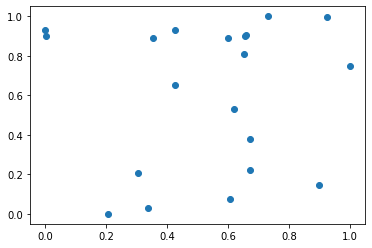

In [125]:
plt.scatter(Xnorm, ynorm)

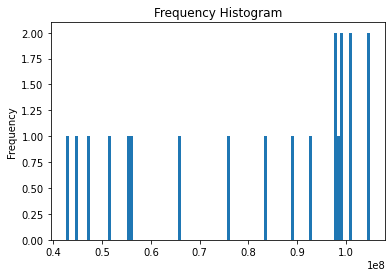

In [126]:
# x = np.random.normal(size = 1000)
plt.hist(y, bins=100)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

In [127]:
(unique, counts) = np.unique(Xnorm, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[0.        , 1.        ],
       [0.0038332 , 1.        ],
       [0.20698127, 1.        ],
       [0.30374925, 1.        ],
       [0.33619394, 1.        ],
       [0.35424717, 1.        ],
       [0.42507072, 1.        ],
       [0.42744504, 1.        ],
       [0.59960892, 1.        ],
       [0.60544928, 1.        ],
       [0.61883798, 1.        ],
       [0.65287255, 1.        ],
       [0.65736887, 1.        ],
       [0.66084948, 1.        ],
       [0.67183151, 1.        ],
       [0.67349741, 1.        ],
       [0.73176846, 1.        ],
       [0.89907858, 1.        ],
       [0.92478849, 1.        ],
       [1.        , 1.        ]])

In [128]:
(unique, counts) = np.unique(y, return_counts=True)
frequencies = np.asarray((unique, counts)).T
counts

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [129]:
X_train, X_test, y_train, y_test = train_test_split(x, ynorm , test_size=0.1)

In [130]:
X_train.shape

(18, 65, 65, 3)

In [131]:
y_train.shape

(18,)

In [132]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(2,2 ), activation='relu', kernel_initializer='glorot_uniform', input_shape=(65,65,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(256, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 64, 64, 64)        832       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 65536)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               16777472  
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 257       
Total params: 16,778,561
Trainable params: 16,778,561
Non-trainable params: 0
__________________________________________

In [133]:
# Compile the model
model.compile( loss=tf.keras.losses.MeanSquaredError(),
              optimizer=keras.optimizers.Adam(lr=0.00001),
              metrics=['mae'])

# Fit data to model
history = model.fit(X_train ,y_train, validation_data=(X_test,y_test),
            batch_size=1,
            epochs=500,
            verbose=1)

Epoch 1/500
18/18 [==============================] - 1s 23ms/step - loss: 0.2673 - mae: 0.3856 - val_loss: 0.1058 - val_mae: 0.3160
Epoch 2/500
18/18 [==============================] - 0s 7ms/step - loss: 0.1008 - mae: 0.2259 - val_loss: 0.0625 - val_mae: 0.2302
Epoch 3/500
18/18 [==============================] - 0s 7ms/step - loss: 0.3024 - mae: 0.3633 - val_loss: 0.0366 - val_mae: 0.1765
Epoch 4/500
18/18 [==============================] - 0s 7ms/step - loss: 0.1596 - mae: 0.3400 - val_loss: 0.4349 - val_mae: 0.6582
Epoch 5/500
18/18 [==============================] - 0s 7ms/step - loss: 0.2106 - mae: 0.3656 - val_loss: 0.0170 - val_mae: 0.1092
Epoch 6/500
18/18 [==============================] - 0s 7ms/step - loss: 0.2349 - mae: 0.4157 - val_loss: 0.0343 - val_mae: 0.1598
Epoch 7/500
18/18 [==============================] - 0s 7ms/step - loss: 0.2773 - mae: 0.4005 - val_loss: 0.0127 - val_mae: 0.0872
Epoch 8/500
18/18 [==============================] - 0s 7ms/step - loss: 0.3303 - 

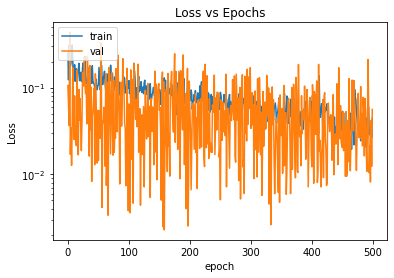

In [134]:
plt.semilogy(history.history['loss'])
plt.semilogy(history.history['val_loss'])
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [135]:
predictions_all = model.predict(x)
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

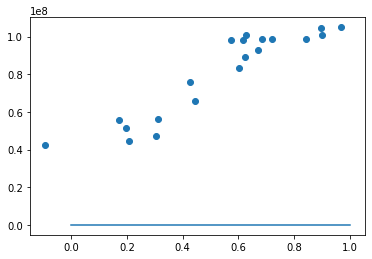

In [141]:
xlim = 1
x = np.linspace(0,xlim,100)
plt.plot(x, x)

# x = np.linspace(1,1,10)
plt.scatter(predictions_all,y)
# plt.plot(x,x)

In [137]:
import seaborn as snsn

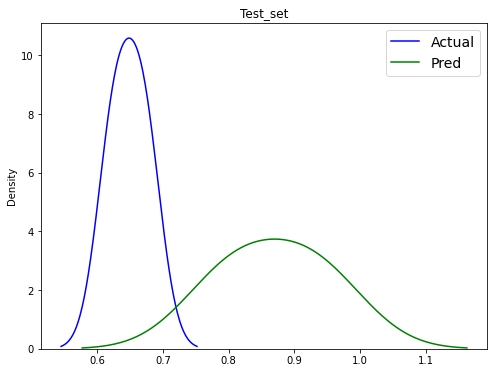

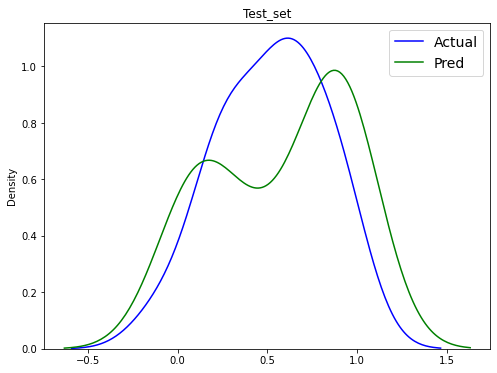

In [138]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(8,6))
sns.kdeplot(predictions_test.ravel(),label="",ax=ax,c='b')
sns.kdeplot(y_test.ravel(),label="",ax=ax,c='g')
ax.legend(['Actual','Pred'],fontsize=14)
ax.title.set_text('Test_set')

fig,ax=plt.subplots(figsize=(8,6))
sns.kdeplot(predictions_train.ravel(),label="",ax=ax,c='b')
sns.kdeplot(y_train.ravel(),label="",ax=ax,c='g')
ax.legend(['Actual','Pred'],fontsize=14)
ax.title.set_text('Test_set')


In [139]:
sns.kdeplot(y,label="",ax=ax,c='b')

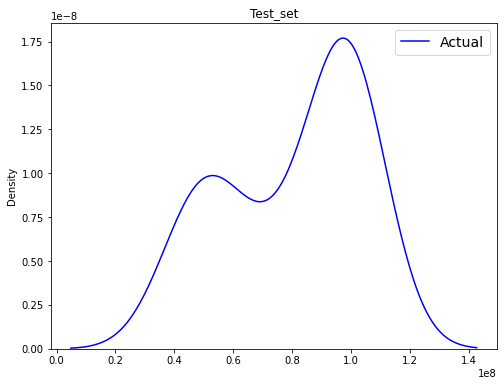

In [140]:
fig,ax=plt.subplots(figsize=(8,6))
sns.kdeplot(y.ravel(),label="",ax=ax,c='b')
# sns.kdeplot(y_test.ravel(),label="",ax=ax,c='g')
ax.legend(['Actual','Pred'],fontsize=14)
ax.title.set_text('Test_set')